# Random Forest


In this Codealong notebook, we’ll look at how to build and use the Random Forest in Python. In addition to seeing the code, we’ll try to get an understanding of how this model works.

In [8]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split   # for out-of-sample evaluation
from sklearn.ensemble import RandomForestClassifier    # for Random Forest model

pd.options.display.max_columns = 350   # to display all columns of dataframe in cell output

In [3]:
# set a random seed to get reproducible results
r_seed = 50

In [9]:
# Load the dataset
# Full dataset: https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system

df = pd.read_csv('https://s3.amazonaws.com/projects-rf/clean_data.csv')
print(df.shape)
df.head()

(99719, 314)


,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,label,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,49.0,4.0,1100.0,2.015009e+09,2.015009e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,1.0,3.0,1.0,2.0,1.0,3.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,2.0,1.0,5.0,1.0,NaN,NaN,NaN,2.0,1.0,3.0,8.0,1.0,240.0,506.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,888.0,NaN,NaN,NaN,201.0,202.0,202.0,205.0,202.0,204.0,1.0,64.0,104.0,30.0,88.0,NaN,NaN,888.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,1.0,40.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,1.0,NaN,492019.0,78.216704,1.0,78.216704,2.0,1.0,1.0,281.780097,2.0,0.576010,272.026653,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,40.0,3.0,66.0,168.0,10886.0,3874.0,4.0,2.0,4.0,3.0,5.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.400000e+01,29.0,2.900000e+01,7.100000e+01,2.900000e+01,57.0,5.397605e-79,5.397605e-79,1.0,1.0,43.0,186.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.0,35.0,5.397

In [18]:
# Extract the labels (our response variable) by 'popping' it from the dataframe

labels = np.array(df.pop('label'))
labels

array([1., 1., 1., ..., 1., 1., 1.])

In [47]:
# let's check the counts of unique values within the labels

unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0.0: 18579, 1.0: 81140}

In [48]:
# We have much more 1's than 0's - let's compute the percentage of 0's in labels (to check stratification later)
print('Percentage of zeros: ', (counts[0]/sum(counts)).round(3)*100)

Percentage of zeros:  18.6


In [57]:
# do a train/test split of the data with 30% examples in the test data

train, test, train_labels, test_labels = train_test_split(df, labels,  # split features and labels
                                         stratify = labels,      # split in stratified fashion (i.e. balance labels)
                                         test_size = 0.3,        # ensures 30%/70% split for test/train data
                                         random_state = r_seed)  # use random seed to make the split reproducible

In [58]:
# let's check the shape of the resulting train and test data
train.shape, test.shape, train_labels.shape, test_labels.shape

((69803, 313), (29916, 313), (69803,), (29916,))

In [59]:
# lets's check the result of the stratification by labels for training and testing data

unique, counts = np.unique(train_labels, return_counts=True)
print('value counts in train data: ', dict(zip(unique, counts)))
print('Percentage of zeros in train data: ', (counts[0]/sum(counts)).round(3)*100)

unique, counts = np.unique(test_labels, return_counts=True)
print('value counts in test data:  ', dict(zip(unique, counts)))
print('Percentage of zeros in test data: ', (counts[0]/sum(counts)).round(3)*100)

value counts in train data:  {0.0: 13005, 1.0: 56798}
Percentage of zeros in train data:  18.6
value counts in test data:   {0.0: 5574, 1.0: 24342}
Percentage of zeros in test data:  18.6


In [64]:
# Count missing values in train/test data
train.isna().sum().sort_values(ascending=False)
test.isna().sum().sort_values(ascending=False)

COLGHOUS    29914
LADULT      29914
ASERVIST    29890
ASDRVIST    29890
ASNOSLEP    29884
ASTHMED3    29874
ASINHALR    29874
ASYMPTOM    29873
ASRCHKUP    29871
ASACTLIM    29871
ASATTACK    29870
STREHAB1    29863
CCLGHOUS    29855
PCPSADE1    29853
VINOCRE2    29851
ASTHMAGE    29836
HAREHAB1    29831
HPVADSHT    29826
VIEYEXM2    29753
VICTRCT4    29714
VIINSUR2    29714
VIMACDG2    29714
VIGLUMA2    29714
VIPRFVS2    29713
VIDFCLT2    29713
VIREDIF3    29713
PCPSARS1    29672
PSATIME     29672
CDHELP      29592
LENGEXAM    29577
            ...  
_RFHYPE5        0
_HCVU651        0
_LLCPWT         0
_DUALUSE        0
_WT2RAKE        0
_RAWRAKE        0
_STSTR          0
_AGE80          0
_AGE_G          0
_RFBMI5         0
_MISFRTN        0
_VEGLT1         0
_FRTLT1         0
EMPLOY1         0
CHILDREN        0
_VEGRESP        0
QSTLANG         0
_FRTRESP        0
_MISVEGN        0
_RFDRHV5        0
_CHLDCNT        0
_DRNKWEK        0
_RFBING5        0
DROCDY3_        0
DRNKANY5  

In [65]:
# Imputation of missing values in train and test data by respective mean value (done for each column)
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [66]:
# Now count again missing values in train/test data after imputation --> none left
train.isna().sum().sort_values(ascending=False)
test.isna().sum().sort_values(ascending=False)

_AIDTST3    0
CHKHEMO3    0
WHRTST10    0
PDIABTST    0
PREDIAB1    0
INSULIN     0
BLDSUGAR    0
FEETCHK2    0
DOCTDIAB    0
FEETCHK     0
HIVTST6     0
EYEEXAM     0
DIABEYE     0
DIABEDU     0
CAREGIV1    0
CRGVREL1    0
CRGVLNG1    0
CRGVHRS1    0
HIVTSTD3    0
PNEUVAC3    0
ARTTODAY    0
EXERHMM2    0
VEGETAB1    0
EXERANY2    0
EXRACT11    0
EXEROFT1    0
EXERHMM1    0
EXRACT21    0
EXEROFT2    0
STRENGTH    0
           ..
_HCVU651    0
_CHOLCHK    0
EMTSUPRT    0
_RFCHOL     0
_MICHD      0
_LTASTH1    0
_CASTHM1    0
_ASTHMS1    0
_DRDXAR1    0
_PRACE1     0
_CHISPNC    0
_WT2RAKE    0
_RAWRAKE    0
_STRWT      0
LSATISFY    0
ADPLEASR    0
ADDOWN      0
ADSLEEP     0
ADENERGY    0
ADEAT1      0
ADFAIL      0
ADTHINK     0
ADMOVE      0
MISTMNT     0
ADANXEV     0
QSTVER      0
QSTLANG     0
MSCODE      0
_STSTR      0
_STATE      0
Length: 313, dtype: int64

In [68]:
# Make a list of feature names for later feature importances
features = list(train.columns)
features[:5]

['_STATE', 'FMONTH', 'DISPCODE', 'SEQNO', '_PSU']

In [71]:
# Create the Random Forest model (i.e. an instantiation of the RF model class) with 100 decision trees

model = RandomForestClassifier(n_estimators=100,       # include 100 trees
                               random_state=r_seed,    # random seed to generate reproducible model
                               max_features = 'sqrt',  # number of features to consider when looking for best split
                                                       # if "sqrt": `max_features=sqrt(n_features)` (same as "auto")
                               n_jobs=-1,      # number of jobs to run in parallel for both `fit` and `predict`
                                               # if "-1": use all processors
                               verbose = 1)    # controls the verbosity (Ausführlichkeit)) when fitting & predicting
                                               # (how much info is printed/returned during fitting/predicting) 

In [72]:
# Fit the model on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [80]:
# Print some summary statistics of the trees in the random forest model

# first create empty lists to store the number of nodes (n_nodes) and maximal tree depths (max_depths)
n_nodes = []
max_depths = []

# get infos about all 100 decision trees in RF model (infos are contained in models.estimators_)
for ind_tree in model.estimators_:               # loop over all 100 trees within the RF model
    n_nodes.append(ind_tree.tree_.node_count)    # get node counts for each tree (i.e. for each tree_ object)
    max_depths.append(ind_tree.tree_.max_depth)  # get max depth for each tree (i.e. for each tree_ object)
    
# print the summary statistics over all trees
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Average maximum depth: {int(np.mean(max_depths))}')

Average number of nodes: 13396
Average maximum depth: 46


In [84]:
# Make predictions based on RF model for training data - to demonstrate overfitting

train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]   # only take second column (which holds prob of label=1)
                                                    # (first column is prob of label=0, which is 1 - p(label=1))
print('train data - binary label predictions: ', train_rf_predictions)
print('train data - probability of label predictions: ', train_rf_probs)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s


train data - binary label predictions:  [1. 1. 0. ... 1. 1. 1.]
train data - probability of label predictions:  [1.   1.   0.14 ... 1.   0.96 0.96]


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


In [83]:
# Make predictions based on RF model for testing data - to evaluate performance

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]         # only take second column (which holds prob of label=1)
                                                   # (first column is prob of label=0, which is 1 - p(label=1))
print('train data - binary label predictions: ', rf_predictions)
print('train data - probability of label predictions: ', rf_probs)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


train data - binary label predictions:  [1. 1. 1. ... 1. 1. 1.]
train data - probability of label predictions:  [0.95 0.98 0.85 ... 0.98 0.67 1.  ]


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


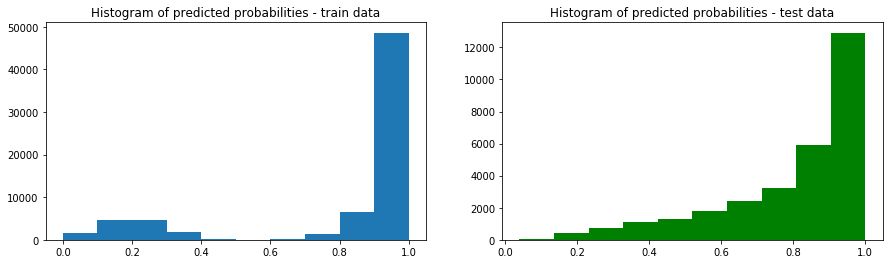

In [93]:
import matplotlib.pyplot as plt

plt.subplots(1,2,figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(train_rf_probs)
plt.title('Histogram of predicted probabilities - train data')

plt.subplot(1,2,2)
plt.hist(rf_probs, color='g')
plt.title('Histogram of predicted probabilities - test data');

In [94]:
# import some metrics from sklearn to evaluate RF model performance
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

# Plot formatting
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

In [99]:
# create a function that prints some model performance metrics (precision, recall) and plots ROC curve

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    # compute metrics for baseline model and store in 'baseline' dict
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])   # predicts a label of 1 for test item
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])  # predicts a label of 1 for test item
    baseline['roc'] = 0.5
    
    # compute metrics for our RF model and store in 'results' dict - based on test data
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    # compute metrics for our RF model and store in 'results' dict - based on train data
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    # print metrics for each model
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

Recall Baseline: 1.0 Test: 0.96 Train: 1.0
Precision Baseline: 0.81 Test: 0.88 Train: 1.0
Roc Baseline: 0.5 Test: 0.87 Train: 1.0


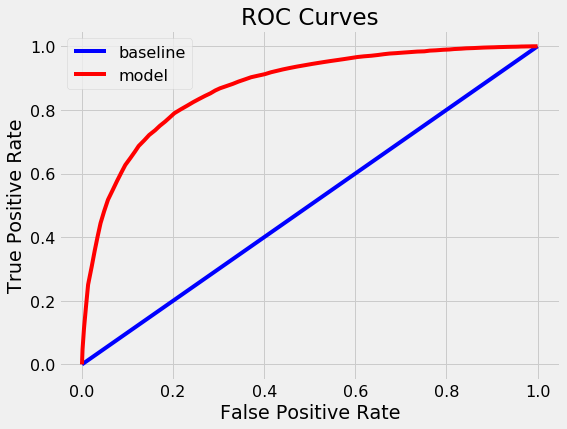

<Figure size 432x288 with 0 Axes>

In [100]:
# call the function
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png');

In [101]:
# create a function that plots the confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[ 2438  3136]
 [ 1043 23299]]


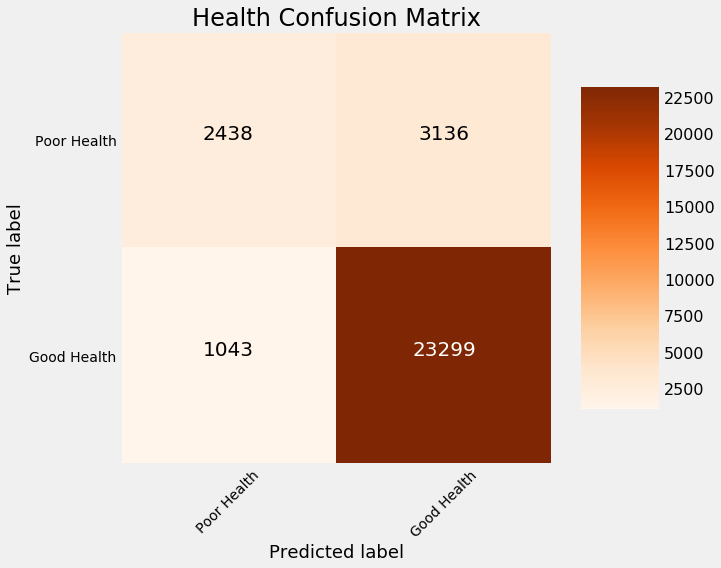

In [102]:
# call the function
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')
plt.savefig('cm.png')